In [194]:
#%matplotlib qt

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import linregress
import ZebraLib as zb
from scipy.optimize import curve_fit

class cilindro():
    def __init__(self, d, k, c, L, p, h):
        self.d = d
        self.k = k
        self.c = c
        self.L = L
        self.p = p
        self.h = h

    @property
    def bi(self):
        r = self.d/2
        V = np.pi*r**2*self.L
        As = 2*np.pi*r*(self.L+r)
        Lc = V/As
        return self.h*Lc/self.k

    @property
    def tau(self):
        r = self.d/2
        V = np.pi*(r**2)*self.L
        As = 2*np.pi*r*(self.L+r)
        return (self.p*self.c*V)/(self.h*As)

def T(E):
    return 4.0 + 22.9*E

def dist_temp(t, tau, ti, t_inf):
    return ((np.e**(-t/tau))*(ti - t_inf)) + t_inf

### Plot dos resultados experimentais

In [195]:
#import dos dados
df = pd.read_excel('D:/UNESP/EngMec-UNESP/Lab. TCM I/Relatório_4/dados_brutos_mV.xlsx')

#Transformando os mv em C
df2 = pd.DataFrame({'ca1':T(df.ca1), 'cr1':T(df.cr1), 'ca2':T(df.ca2), 'cr2':T(df.cr2), 
                    'ca3':T(df.ca3), 'cr3':T(df.cr3), 'ca4':T(df.ca4), 'cr4':T(df.cr4)})
                    
#df2

### Plot do aquecimento e resfriamento 4 cilindros - $$T_{\infty}=40ºC$$

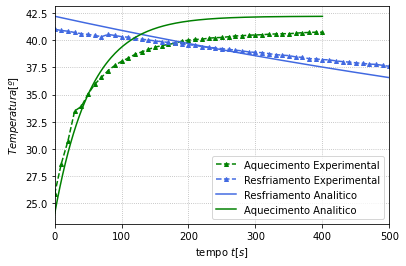

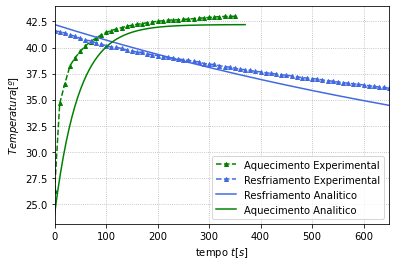

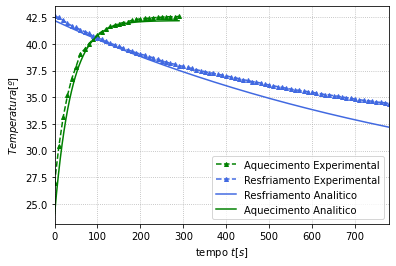

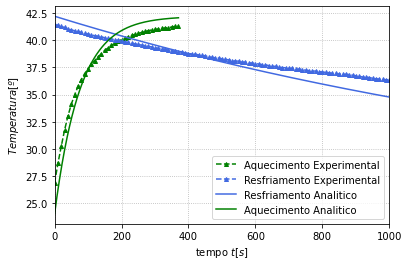

In [196]:
ca1 = cilindro(0.05, 237, 896, 0.200, 2707, 500)
ca2 = cilindro(0.05, 237, 896, 0.085, 2707, 500)
ca3 = cilindro(0.035, 237, 896, 0.200, 2707, 500)
ca4 = cilindro(0.05, 42.53, 383, 0.200, 8954, 500)

cr1 = cilindro(0.05, 237, 896, 0.200, 2707, 20)
cr2 = cilindro(0.05, 237, 896, 0.085, 2707, 20)
cr3 = cilindro(0.035, 237, 896, 0.200, 2707, 20)
cr4 = cilindro(0.05, 42.53, 383, 0.200, 8954, 20)

cr = [cr1, cr2, cr3, cr4]
ca = [ca1, ca2, ca3, ca4]

crd = [df.cr1, df.cr2, df.cr3, df.cr4]
cad = [df.ca1, df.ca2, df.ca3, df.ca4]

tr = [500, 650, 780, 1000]
ta = [400, 370, 290, 370]

for i in range(len(cr)):

    fig, ax = plt.subplots()
    
    ax.set(xlim=(0, tr[i]), xlabel = r'tempo $t[s]$', ylabel = r'$Temperatura [º]$')

    #DADOS AQUECIMENTO
    ax.plot(df.tempo[:len(cad[i])], T(cad[i]), label = "Aquecimento Experimental", c='green', marker='^', markersize=4, ls='--')
    #ax.errorbar(df.tempo[:len(cad[i])], T(cad[i]), xerr=.01/(3)**0.5, yerr=0.5/(3)**0.5, fmt='^', markeredgecolor='black', 
    #    markerfacecolor='green', markersize=5, capsize=5, ecolor='green')

    #DADOS RESFRIAMENTO
    ax.plot(df.tempo[:len(crd[i])],  T(crd[i]), label = "Resfriamento Experimental",  c='royalblue', marker='^', markersize=4, ls='--')
    #ax.errorbar(df.tempo[:len(cad[i])],  T(crd[i]), xerr=.01/(3)**0.5, yerr=0.5/(3)**0.5, fmt='^', markeredgecolor='black', 
    #    markerfacecolor='royalblue', markersize=5, capsize=5, ecolor='royalblue')

    #ANALITICO - RESFRIAMENTO E AQUECIMENTO
    t = np.linspace(0.1, tr[i], 200)
    ax.plot(t, dist_temp(t, cr[i].tau, 42.2, 24), label = "Resfriamento Analitico", c='royalblue')

    t = np.linspace(0.1, ta[i], 200)
    ax.plot(t, dist_temp(t, ca[i].tau, 24, 42.2), c='green', label = "Aquecimento Analitico")

    ax.grid(ls='dotted')
    ax.legend()
    fig.savefig(f'figura{i+1}.pdf', bbox_inches='tight')

### Todas as curvas de aquecimento

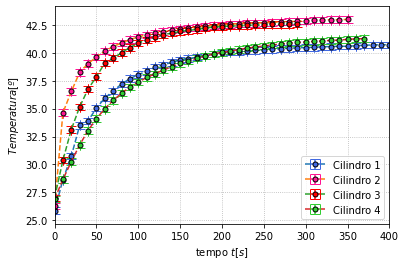

In [197]:
fig, ax = plt.subplots()

ax.set(xlim=(0, 400), xlabel = r'tempo $t[s]$', ylabel = r'$Temperatura [º]$')

t = np.linspace(0.1, 10)

ax.errorbar(df.tempo, T(df.ca1), xerr=.01/(3)**0.5, yerr=0.5/(3)**0.5, fmt='o', markeredgecolor='black', 
    markerfacecolor='royalblue', markersize=5, capsize=5, ecolor='royalblue', ls='--', label='Cilindro 1')
ax.errorbar(df.tempo, T(df.ca2), xerr=.01/(3)**0.5, yerr=0.5/(3)**0.5, fmt='o', markeredgecolor='black', 
    markerfacecolor='deeppink', markersize=5, capsize=5, ecolor='deeppink', ls='--', label='Cilindro 2')
ax.errorbar(df.tempo, T(df.ca3), xerr=.01/(3)**0.5, yerr=0.5/(3)**0.5, fmt='o', markeredgecolor='black', 
    markerfacecolor='red', markersize=5, capsize=5, ecolor='red', ls='--', label='Cilindro 3')
ax.errorbar(df.tempo, T(df.ca4), xerr=.01/(3)**0.5, yerr=0.5/(3)**0.5, fmt='o', markeredgecolor='black', 
    markerfacecolor='limegreen', markersize=5, capsize=5, ecolor='limegreen', ls='--', label='Cilindro 4')

ax.grid(ls='dotted')
ax.legend()

fig.savefig('aquecimento.pdf', bbox_inches='tight')

### Todas as curvas de resfriamento

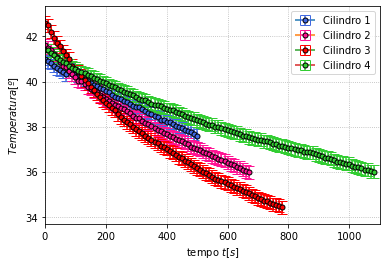

In [198]:
fig, ax = plt.subplots()

ax.set(xlim=(0, 1100), xlabel = r'tempo $t[s]$', ylabel = r'$Temperatura [º]$')

t = np.linspace(0.1, 10)

ax.errorbar(df.tempo, T(df.cr1), xerr=.01/(3)**0.5, yerr=0.5/(3)**0.5, fmt='o', markeredgecolor='black', 
    markerfacecolor='royalblue', markersize=5, capsize=5, ecolor='royalblue', ls='--', label='Cilindro 1')
ax.errorbar(df.tempo, T(df.cr2), xerr=.01/(3)**0.5, yerr=0.5/(3)**0.5, fmt='o', markeredgecolor='black', 
    markerfacecolor='deeppink', markersize=5, capsize=5, ecolor='deeppink', ls='--', label='Cilindro 2')
ax.errorbar(df.tempo, T(df.cr3), xerr=.01/(3)**0.5, yerr=0.5/(3)**0.5, fmt='o', markeredgecolor='black', 
    markerfacecolor='red', markersize=5, capsize=5, ecolor='red', ls='--', label='Cilindro 3')
ax.errorbar(df.tempo, T(df.cr4), xerr=.01/(3)**0.5, yerr=0.5/(3)**0.5, fmt='o', markeredgecolor='black', 
    markerfacecolor='limegreen', markersize=5, capsize=5, ecolor='limegreen', ls='--', label='Cilindro 4')

ax.grid(ls='dotted')
ax.legend()

fig.savefig('resfriamento.pdf', bbox_inches='tight')

### Cálculo do numero de Bi

In [199]:
ca1 = cilindro(0.05, 237, 896, 0.200, 2707, 500)
ca2 = cilindro(0.05, 237, 896, 0.085, 2707, 500)
ca3 = cilindro(0.035, 237, 896, 0.200, 2707, 500)
ca4 = cilindro(0.05, 413, 383, 0.200, 8954, 500)

cr1 = cilindro(0.05, 237, 896, 0.200, 2707, 20)
cr2 = cilindro(0.05, 237, 896, 0.085, 2707, 20)
cr3 = cilindro(0.035, 237, 896, 0.200, 2707, 20)
cr4 = cilindro(0.05, 413, 383, 0.200, 8954, 20)

cr = [cr1.bi, cr2.bi, cr3.bi, cr4.bi]
ca = [ca1.bi, ca2.bi, ca3.bi, ca4.bi]

pd.DataFrame({'a':ca, 'b':cr})

,a,b
0,0.023441,0.000938
1,0.020378,0.000815
2,0.016975,0.000679
3,0.013452,0.000538


### Gerando os dados analíticos

In [200]:
t = np.linspace(0.1, 500, 109)

A1 = dist_temp(t, ca1.tau, 42.5, 26)
A2 = dist_temp(t, ca2.tau, 42.5, 26)
A3 = dist_temp(t, ca3.tau, 42.5, 26)
A4 = dist_temp(t, ca4.tau, 42.5, 26)

C1 = dist_temp(t, cr1.tau, 26, 42.5)
C2 = dist_temp(t, cr2.tau, 26, 42.5)
C3 = dist_temp(t, cr3.tau, 26, 42.5)
C4 = dist_temp(t, cr4.tau, 26, 42.5)

cr = [C1, C2, C3, C4]
ca = [A1, A2, A3, A4]

df = pd.DataFrame({'A1':A1, 'A2':A2, 'A3':A3, 'A4':A4, 'C1':C1, 'C2':C2, 'C3':C3, 'C4':C4})
df
#df.to_excel('D:/UNESP/EngMec-UNESP/Lab. TCM I/Relatório_4/dados_analitico.xlsx')

,A1,A2,A3,A4,C1,C2,C3,C4
0,42.469416,42.464823,42.457780,42.478363,26.001224,26.001409,26.001691,26.000866
1,41.114104,40.916080,40.617312,41.507299,26.057802,26.066473,26.079768,26.040902
2,39.870324,39.513018,38.982663,40.593459,26.114185,26.131281,26.157476,26.080841
3,38.728898,38.241933,37.530817,39.733472,26.170375,26.195834,26.234816,26.120683
4,37.681403,37.090411,36.241330,38.924163,26.226372,26.260132,26.311790,26.160428
...,...,...,...,...,...,...,...,...
104,26.002177,26.000568,26.000072,26.029759,30.957465,31.561115,32.426418,29.684692
105,26.001998,26.000515,26.000064,26.028005,30.997047,31.604254,32.474090,29.715789
106,26.001834,26.000467,26.000057,26.026355,31.036493,31.647223,32.521537,29.746810
107,26.001683,26.000423,26.000051,26.024802,31.075803,31.690023,32.568760,29.777756
